# Three Generations Romance

![The OkCupid logo](https://logodix.com/logo/834301.png)

## A data science approach to profiling online daters according to age & generation

1. Can your dating profile predict your age?
2. Can your dating profile predict the generation you belong to? (Millennial, Gen X-er, or Boomers)

Using a dataset of almost 60,000 anonymized entries from the dating platform OKCupid, You will explore the above questions using supervised machine learning techniques. You will examine different aspects or features of user profiles and see which ones you will integrate into your models to achieve the most satisfactory scores. You will use regression techniques to tackle the first question and classification models to address the second.
<br>
By exploring the “last_online” feature’s min and max, the OKCupid dataset could be inferred to be dated around 2011 or 2012. At the time, a “Millennial” would be aged from 18 to 32, a “Gen X-er” 33 to 47, and “Boomers” from 48 to 70 years old.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('profiles.csv')

/var/folders/qp/9j67xhhx3z1_9y5zm_dghclw0000gn/T/ipykernel_7586/2923526071.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,19,20,21,22,23,24,25,26,27,28,29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('profiles.csv')


In [3]:
df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22.0,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35.0,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38.0,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23.0,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29.0,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [4]:
df.shape

(60552, 31)

In [5]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
60547     True
60548     True
60549     True
60550     True
60551     True
Length: 60552, dtype: bool

There are duplicated rows. Lets see them.

In [6]:
df[df.duplicated()]

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
9515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9518,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60547,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60549,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


These columns are all NaN values.

In [7]:
len(df[df.duplicated()])

51037

That is 51037 rows with all nan values. We will drop these.

In [8]:
df.dropna(axis=0, how='all', inplace=True)

In [9]:
df.shape

(9514, 31)

## Picking columns

In [10]:
df.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')

In [11]:
df = df[['age', 'body_type', 'drinks', 'drugs', 'education', 'income', 'smokes', 'status', 'offspring', 'sex', 'height']]

In [12]:
df.head()

,age,body_type,drinks,drugs,education,income,smokes,status,offspring,sex,height
0,22.0,a little extra,socially,never,working on college/university,-1.0,sometimes,single,"doesn&rsquo;t have kids, but might want them",m,75.0
1,35.0,average,often,sometimes,working on space camp,80000.0,no,single,"doesn&rsquo;t have kids, but might want them",m,70.0
2,38.0,thin,socially,NaN,graduated from masters program,-1.0,no,available,NaN,m,68.0
3,23.0,thin,socially,NaN,working on college/university,20000.0,no,single,doesn&rsquo;t want kids,m,71.0
4,29.0,athletic,socially,never,graduated from college/university,-1.0,no,single,NaN,m,66.0


## EDA

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
df.describe()

,age,income,height
count,9514.000000,9514.000000,9514.000000
mean,32.084192,18887.145155,68.337398
std,9.445488,91428.807808,3.905229
min,18.000000,-1.000000,36.000000
25%,25.000000,-1.000000,66.000000
50%,30.000000,-1.000000,68.000000
75%,36.000000,-1.000000,71.000000
max,110.000000,1000000.000000,95.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9514 entries, 0 to 9513
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        9514 non-null   float64
 1   body_type  8666 non-null   object 
 2   drinks     9012 non-null   object 
 3   drugs      7215 non-null   object 
 4   education  8459 non-null   object 
 5   income     9514 non-null   float64
 6   smokes     8596 non-null   object 
 7   status     9514 non-null   object 
 8   offspring  3886 non-null   object 
 9   sex        9514 non-null   object 
 10  height     9514 non-null   float64
dtypes: float64(3), object(8)
memory usage: 891.9+ KB


In [16]:
df['drinks'].unique()

array(['socially', 'often', 'not at all', 'rarely', nan, 'very often',
       'desperately'], dtype=object)

In [17]:
df['smokes'].unique()

array(['sometimes', 'no', nan, 'when drinking', 'yes', 'trying to quit'],
      dtype=object)

In [18]:
df['drugs'].unique()

array(['never', 'sometimes', nan, 'often'], dtype=object)

In [19]:
df['status'].unique()

array(['single', 'available', 'seeing someone', 'married'], dtype=object)

In [20]:
nulls = df.isnull().sum()

In [21]:
nulls[nulls > 0]

body_type     848
drinks        502
drugs        2299
education    1055
smokes        918
offspring    5628
dtype: int64

In [22]:
nulls[nulls > 0] * 100 / len(df)

body_type     8.913181
drinks        5.276435
drugs        24.164389
education    11.088922
smokes        9.648938
offspring    59.154930
dtype: float64

The drugs column have way too many empty values so we will drop it.

In [23]:
df.drop('drugs', axis=1, inplace=True)

Lets work with filling the other columns.

In [24]:
nulls = df.isnull().sum()
nulls[nulls > 0] * 100 / len(df)

body_type     8.913181
drinks        5.276435
education    11.088922
smokes        9.648938
offspring    59.154930
dtype: float64

In [25]:
df['body_type'].unique()

array(['a little extra', 'average', 'thin', 'athletic', 'fit', nan,
       'skinny', 'curvy', 'full figured', 'jacked', 'rather not say',
       'used up', 'overweight'], dtype=object)

In [26]:
df['body_type'].value_counts()

body_type
average           2274
fit               2040
athletic          1888
thin               740
curvy              626
a little extra     430
skinny             269
full figured       181
overweight          69
jacked              64
used up             47
rather not say      38
Name: count, dtype: int64

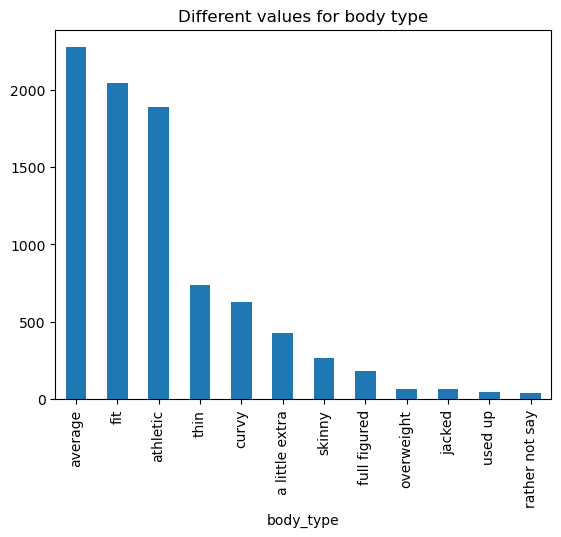

In [27]:
df['body_type'].value_counts().plot(kind='bar');
plt.title('Different values for body type');

We can see some columns here represent similiar things. We fill merge them for simplicity.

In [28]:
df['body_type'] = ['thin' if bt == 'skinny' else bt for bt in df['body_type']]

In [29]:
df['body_type'] = ['a little extra' if bt == 'full figured' else bt for bt in df['body_type']]

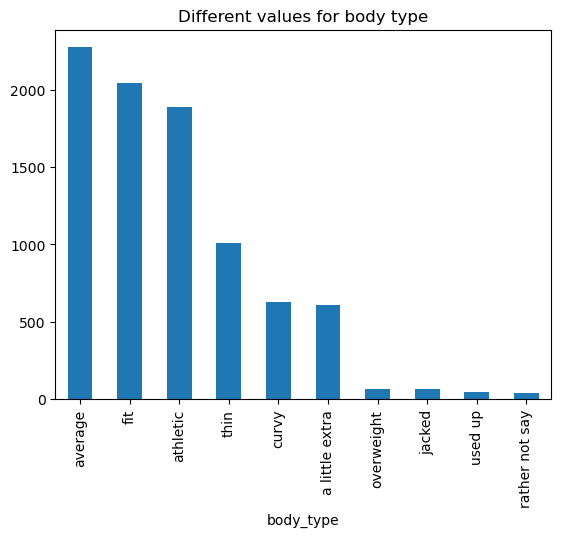

In [30]:
df['body_type'].value_counts().plot(kind='bar');
plt.title('Different values for body type');

We will fill the null values with 'average' here.

In [31]:
df['body_type'].fillna('average', inplace=True)

In [32]:
nulls = df.isnull().sum()
nulls[nulls > 0] * 100 / len(df)

drinks        5.276435
education    11.088922
smokes        9.648938
offspring    59.154930
dtype: float64

Lets look at drinks and smokes.

In [33]:
df['drinks']

0       socially
1          often
2       socially
3       socially
4       socially
          ...   
9509    socially
9510    socially
9511    socially
9512      rarely
9513      rarely
Name: drinks, Length: 9514, dtype: object

In [34]:
df['smokes']

0           sometimes
1                  no
2                  no
3                  no
4                  no
            ...      
9509               no
9510        sometimes
9511    when drinking
9512               no
9513               no
Name: smokes, Length: 9514, dtype: object

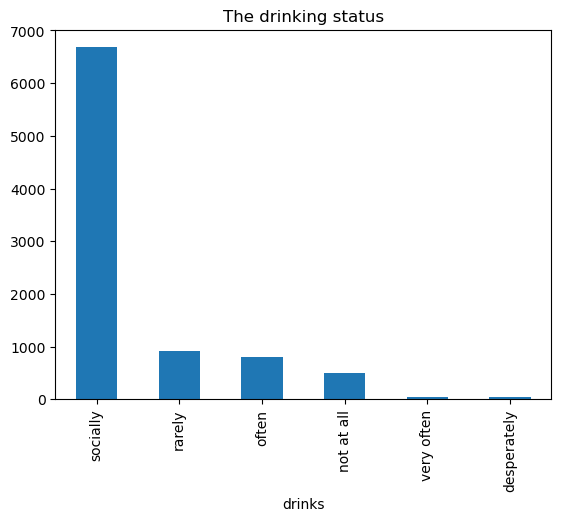

In [35]:
df['drinks'].value_counts().plot(kind='bar');
plt.title('The drinking status');

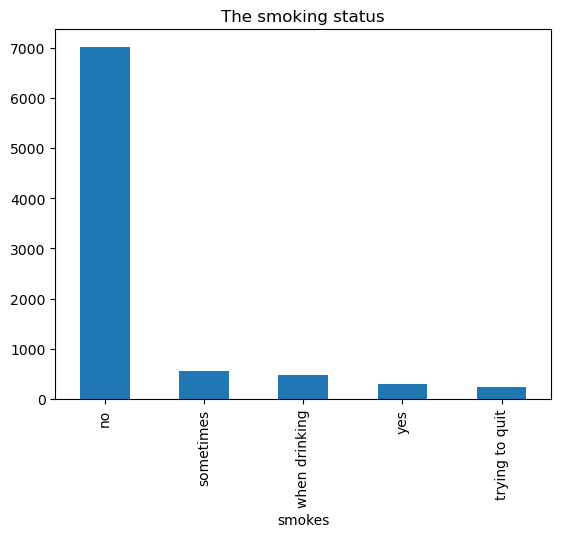

In [36]:
df['smokes'].value_counts().plot(kind='bar');
plt.title('The smoking status');

Looks like most people are social drinkers and they do not smoke. We will use these values for data imputation.

In [37]:
df['drinks'].fillna('socially', inplace=True)
df['smokes'].fillna('no', inplace=True)

In [38]:
nulls = df.isnull().sum()
nulls[nulls > 0] * 100 / len(df)

education    11.088922
offspring    59.154930
dtype: float64

Finally lets simplify these columns. You either smoke or not. Similiarly you either drink or not. 

In [39]:
df['drinks'] = [False if d == 'not at all' else True for d in df['drinks']]
df['smokes'] = [False if s == 'no' else True for s in df['smokes']]

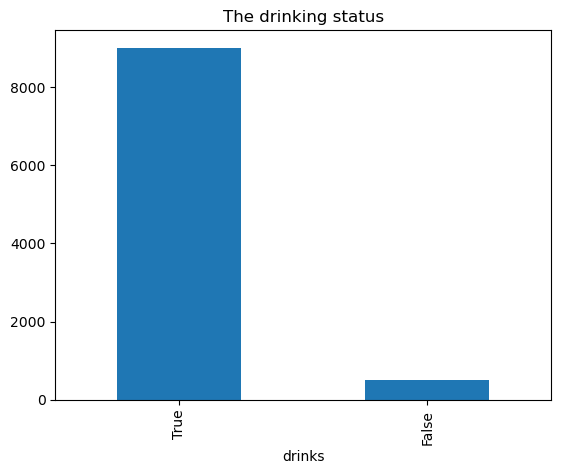

In [40]:
df['drinks'].value_counts().plot(kind='bar', );
plt.title('The drinking status');

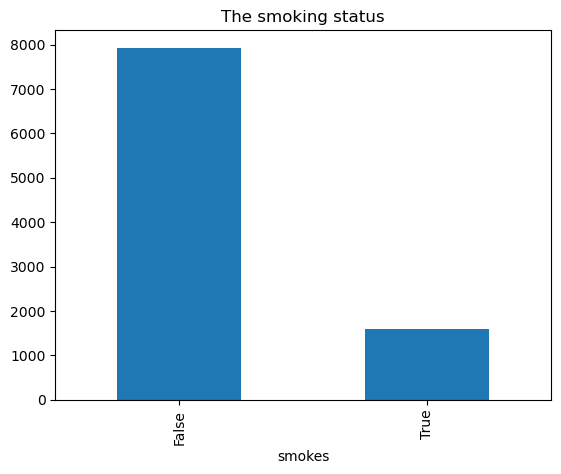

In [41]:
df['smokes'].value_counts().plot(kind='bar');
plt.title('The smoking status');

In [42]:
nulls = df.isnull().sum()
nulls[nulls > 0] * 100 / len(df)

education    11.088922
offspring    59.154930
dtype: float64

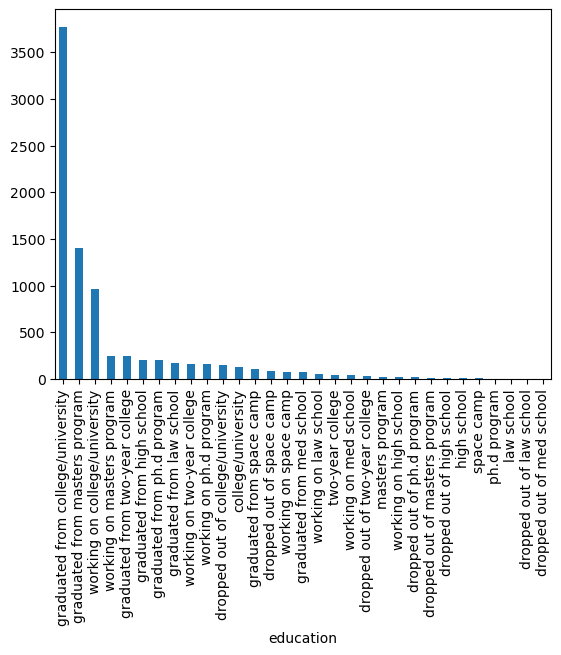

In [43]:
df['education'].value_counts().plot(kind='bar');

Some column names are ambiguous. Does 'high school' represent high school students or graduates?

In [44]:
df[df['education'] == 'high school']['age']

436     47.0
714     33.0
2304    18.0
4066    25.0
5230    43.0
6180    38.0
6342    48.0
6468    38.0
6485    47.0
6552    25.0
7223    29.0
7290    29.0
9398    31.0
Name: age, dtype: float64

The ages tells us these are high school graduates.

In [45]:
df['education'].isnull().sum()

1055

In [46]:
df['education'].fillna(df['education'].mode()[0], inplace=True) # Needs fine tuning

In [47]:
nulls = df.isnull().sum()
nulls[nulls > 0] * 100 / len(df)

offspring    59.15493
dtype: float64

In [48]:
df.head()

,age,body_type,drinks,education,income,smokes,status,offspring,sex,height
0,22.0,a little extra,True,working on college/university,-1.0,True,single,"doesn&rsquo;t have kids, but might want them",m,75.0
1,35.0,average,True,working on space camp,80000.0,False,single,"doesn&rsquo;t have kids, but might want them",m,70.0
2,38.0,thin,True,graduated from masters program,-1.0,False,available,NaN,m,68.0
3,23.0,thin,True,working on college/university,20000.0,False,single,doesn&rsquo;t want kids,m,71.0
4,29.0,athletic,True,graduated from college/university,-1.0,False,single,NaN,m,66.0


## Looking into the columns more

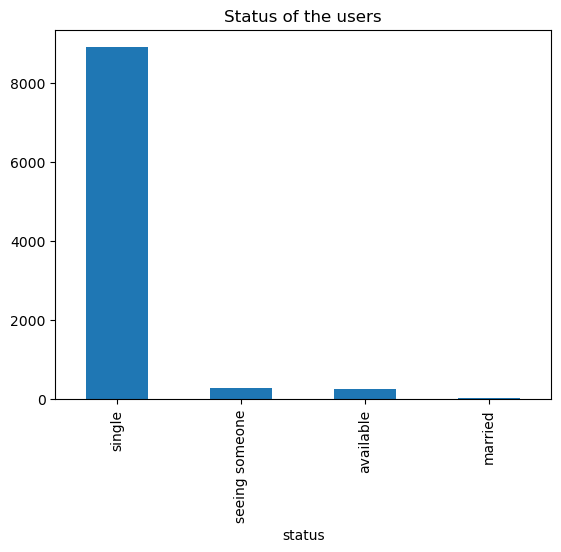

In [49]:
df['status'].value_counts().plot(kind='bar');
plt.title('Status of the users');

As expected, most users of the dating app are single. We will create a boolean column for if a person is available or not. We will also create a new column that indicates if a person is married. This will help with identifying age, since younger people tend to not be married.

In [50]:
df['available'] = [True if p == 'available' or p == 'single' else False for p in df['status']]
df['married'] = [True if p == 'married' else False for p in df['status']]

In [51]:
df.head()

,age,body_type,drinks,education,income,smokes,status,offspring,sex,height,available,married
0,22.0,a little extra,True,working on college/university,-1.0,True,single,"doesn&rsquo;t have kids, but might want them",m,75.0,True,False
1,35.0,average,True,working on space camp,80000.0,False,single,"doesn&rsquo;t have kids, but might want them",m,70.0,True,False
2,38.0,thin,True,graduated from masters program,-1.0,False,available,NaN,m,68.0,True,False
3,23.0,thin,True,working on college/university,20000.0,False,single,doesn&rsquo;t want kids,m,71.0,True,False
4,29.0,athletic,True,graduated from college/university,-1.0,False,single,NaN,m,66.0,True,False


With that we can now drop the status column.f

In [52]:
df.drop('status', axis=1, inplace=True)
df.drop('available', axis=1, inplace=True)

In [53]:
df.head()

,age,body_type,drinks,education,income,smokes,offspring,sex,height,married
0,22.0,a little extra,True,working on college/university,-1.0,True,"doesn&rsquo;t have kids, but might want them",m,75.0,False
1,35.0,average,True,working on space camp,80000.0,False,"doesn&rsquo;t have kids, but might want them",m,70.0,False
2,38.0,thin,True,graduated from masters program,-1.0,False,NaN,m,68.0,False
3,23.0,thin,True,working on college/university,20000.0,False,doesn&rsquo;t want kids,m,71.0,False
4,29.0,athletic,True,graduated from college/university,-1.0,False,NaN,m,66.0,False


In [54]:
# df['orientation'].value_counts().plot(kind='bar')

In [55]:
df['income'].describe()

count       9514.000000
mean       18887.145155
std        91428.807808
min           -1.000000
25%           -1.000000
50%           -1.000000
75%           -1.000000
max      1000000.000000
Name: income, dtype: float64

This column has some values as -1. Since it is marked -1 and nor NaN, I will not treat these values as missing. It will just indicate that this person has no source of income. We will replace these values with 0.

In [56]:
# df['income'] = [0 if i == -1 else i for i in df['income']]
df['income'] = [pd.NA if i == -1 else i for i in df['income']]

In [57]:
null_income = df['income'].isnull().sum()
null_income * 100 / len(df)

80.943872188354

Use imputation to guess income

In [58]:
df.income.describe()

count      1813.0
unique       12.0
top       20000.0
freq        461.0
Name: income, dtype: float64

In [59]:
df['offspring'].unique()

array(['doesn&rsquo;t have kids, but might want them', nan,
       'doesn&rsquo;t want kids',
       'doesn&rsquo;t have kids, but wants them',
       'doesn&rsquo;t have kids', 'wants kids', 'has a kid', 'has kids',
       'doesn&rsquo;t have kids, and doesn&rsquo;t want any',
       'has kids, but doesn&rsquo;t want more',
       'has a kid, but doesn&rsquo;t want more',
       'has a kid, and wants more', 'has kids, and might want more',
       'might want kids', 'has a kid, and might want more',
       'has kids, and wants more'], dtype=object)

In [60]:
df['offspring'] = df['offspring'].str.replace('&rsquo;', "'")
df['offspring'].unique()

array(["doesn't have kids, but might want them", nan, "doesn't want kids",
       "doesn't have kids, but wants them", "doesn't have kids",
       'wants kids', 'has a kid', 'has kids',
       "doesn't have kids, and doesn't want any",
       "has kids, but doesn't want more",
       "has a kid, but doesn't want more", 'has a kid, and wants more',
       'has kids, and might want more', 'might want kids',
       'has a kid, and might want more', 'has kids, and wants more'],
      dtype=object)

In [61]:
df['wants_kids'] = [pd.NA if pd.isna(s) else (True if 'might want' in s or 'wants' in s else False) for s in df['offspring']]
df['has_kids'] = [pd.NA if pd.isna(s) else (True if 'has' in s else False) for s in df['offspring']]

In [62]:
df.sample(5)

,age,body_type,drinks,education,income,smokes,offspring,sex,height,married,wants_kids,has_kids
6503,28.0,athletic,True,graduated from two-year college,<NA>,False,NaN,m,70.0,False,<NA>,<NA>
4372,32.0,average,True,graduated from college/university,<NA>,True,NaN,m,69.0,False,<NA>,<NA>
8803,26.0,athletic,True,graduated from college/university,<NA>,False,NaN,m,69.0,False,<NA>,<NA>
7982,26.0,athletic,True,graduated from college/university,50000.0,False,NaN,m,73.0,False,<NA>,<NA>
3529,27.0,fit,True,graduated from college/university,<NA>,False,NaN,f,63.0,False,<NA>,<NA>


In [63]:
df.drop('offspring', axis=1, inplace=True)

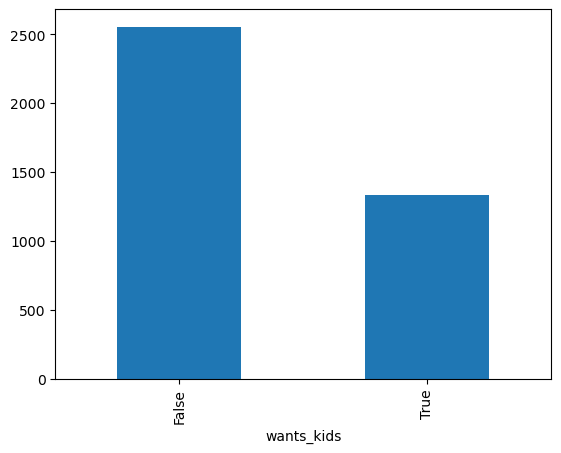

In [64]:
df['wants_kids'].value_counts().plot(kind='bar');

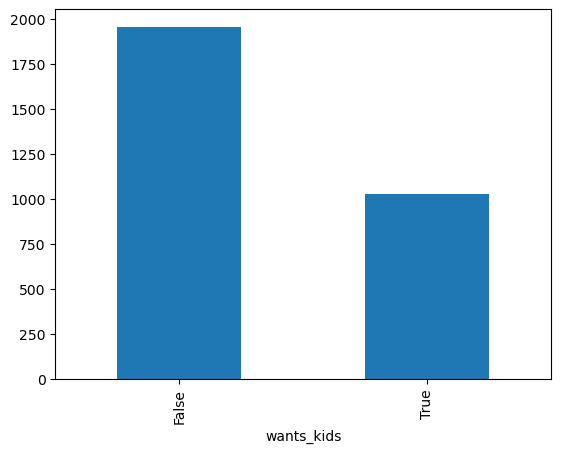

In [65]:
df[df['age'] > 25]['wants_kids'].value_counts().plot(kind='bar');

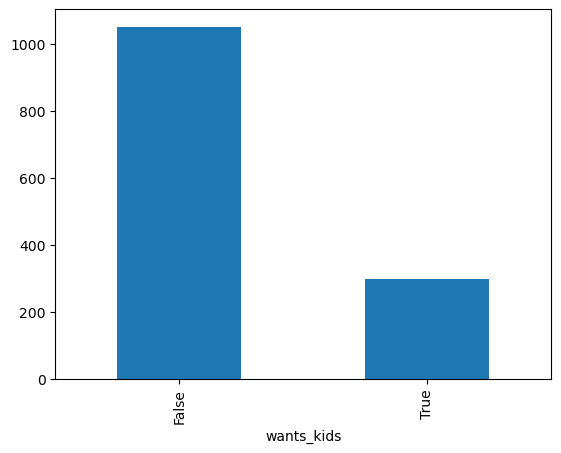

In [66]:
df[df['age'] > 35]['wants_kids'].value_counts().plot(kind='bar');

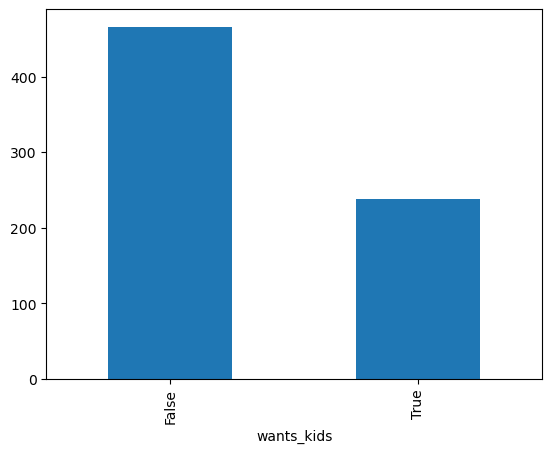

In [67]:
df[df['age'] < 25]['wants_kids'].value_counts().plot(kind='bar');

We can safely assume most age groups do not want kids.

In [68]:
df['wants_kids'].fillna(False, inplace=True)

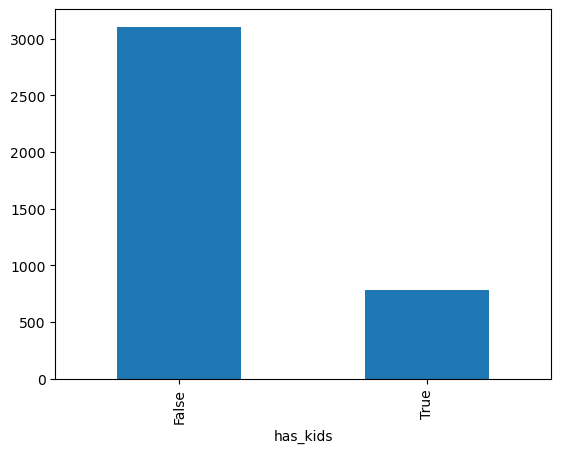

In [69]:
df['has_kids'].value_counts().plot(kind='bar');

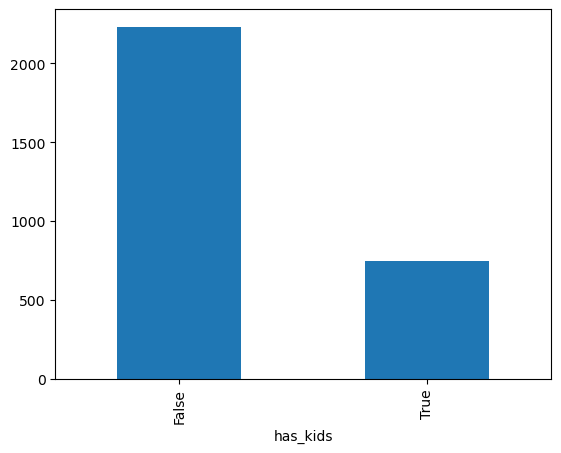

In [70]:
df[df['age'] > 25]['has_kids'].value_counts().plot(kind='bar');

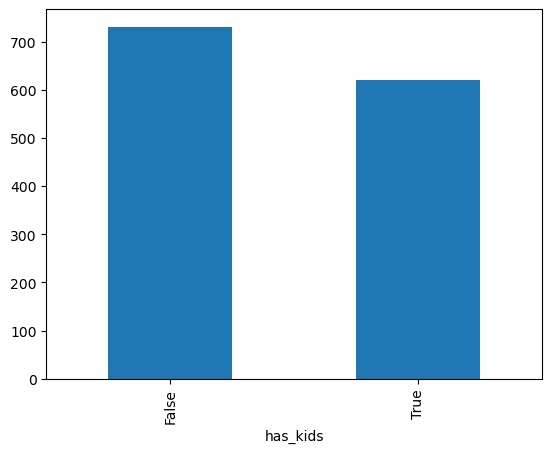

In [71]:
df[df['age'] > 35]['has_kids'].value_counts().plot(kind='bar');

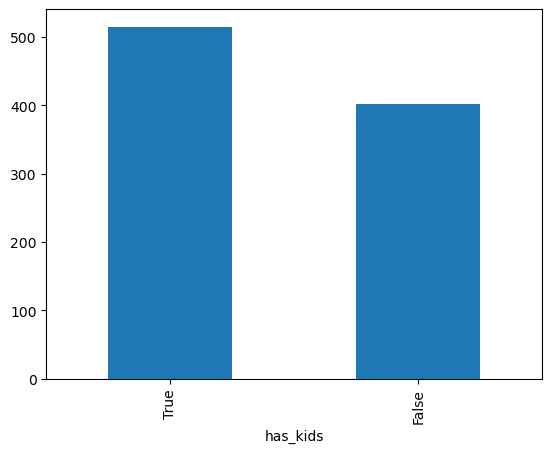

In [72]:
df[df['age'] > 40]['has_kids'].value_counts().plot(kind='bar');

Finally, we will take a look at the mean age of the nan values.

In [73]:
df[df['has_kids'].isnull()]['age'].mean()

30.88717128642502

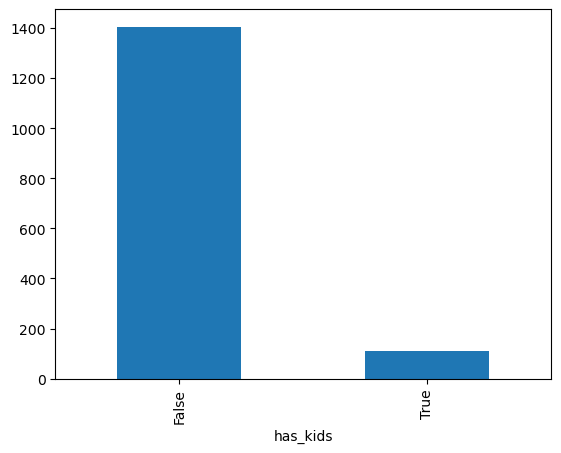

In [74]:
df[(df['age'] > 25) & (df['age'] < 35)]['has_kids'].value_counts().plot(kind='bar');

What we need to fill this data with is clear.

In [75]:
df['has_kids'].fillna(False, inplace=True)

In [76]:
df.head()

,age,body_type,drinks,education,income,smokes,sex,height,married,wants_kids,has_kids
0,22.0,a little extra,True,working on college/university,<NA>,True,m,75.0,False,True,False
1,35.0,average,True,working on space camp,80000.0,False,m,70.0,False,True,False
2,38.0,thin,True,graduated from masters program,<NA>,False,m,68.0,False,False,False
3,23.0,thin,True,working on college/university,20000.0,False,m,71.0,False,False,False
4,29.0,athletic,True,graduated from college/university,<NA>,False,m,66.0,False,False,False


In [77]:
abs(df.corr(numeric_only=True)['age']).sort_values(ascending=False)

age           1.000000
has_kids      0.407890
smokes        0.147282
drinks        0.078490
wants_kids    0.056354
married       0.039005
height        0.022078
Name: age, dtype: float64

In [78]:
df.drop('wants_kids', axis=1, inplace=True)

In [79]:
df['education'].unique()

array(['working on college/university', 'working on space camp',
       'graduated from masters program',
       'graduated from college/university', 'working on two-year college',
       'graduated from high school', 'working on masters program',
       'graduated from space camp', 'college/university',
       'dropped out of space camp', 'graduated from ph.d program',
       'graduated from law school', 'working on ph.d program',
       'two-year college', 'graduated from two-year college',
       'working on med school', 'dropped out of college/university',
       'space camp', 'graduated from med school',
       'dropped out of high school', 'working on high school',
       'masters program', 'dropped out of ph.d program',
       'dropped out of two-year college', 'dropped out of med school',
       'high school', 'working on law school', 'law school',
       'dropped out of masters program', 'ph.d program',
       'dropped out of law school'], dtype=object)

In [80]:
for s in df['education'].str.split():
    print(s[-1])

college/university
camp
program
college/university
college/university
college/university
college/university
college/university
college/university
college
college/university
college/university
college/university
school
college/university
college/university
program
college/university
camp
program
college/university
college/university
college/university
college/university
college/university
college/university
college/university
college/university
program
college/university
college/university
college/university
college/university
college/university
college/university
college/university
college/university
college/university
college/university
college/university
program
college/university
program
college/university
program
college/university
program
college/university
camp
college/university
college/university
college/university
college/university
college/university
college/university
college/university
college/university
college/university
college/university
college/university
college/unive

In [81]:
df[df['education'].str.contains('dropped out')]['education']

48              dropped out of space camp
96              dropped out of space camp
117     dropped out of college/university
128             dropped out of space camp
130     dropped out of college/university
                      ...                
9358    dropped out of college/university
9390            dropped out of space camp
9405            dropped out of space camp
9449       dropped out of masters program
9511    dropped out of college/university
Name: education, Length: 323, dtype: object

In [82]:
df['dropped_out'] = df['education'].str.contains('dropped out')

In [83]:
df['edu_level'] = ['other' if 'camp' in s else f'{s.split()[-2]} {s.split()[-1]}' if 'program' in s or 'school' in s else s.split()[-1] for s in df['education']]

In [84]:
df.sample(15)

,age,body_type,drinks,education,income,smokes,sex,height,married,has_kids,dropped_out,edu_level
2238,49.0,fit,True,graduated from college/university,<NA>,False,m,67.0,False,False,False,college/university
7978,22.0,average,True,graduated from college/university,70000.0,False,m,73.0,False,False,False,college/university
7470,23.0,fit,True,graduated from college/university,<NA>,True,f,63.0,False,False,False,college/university
2780,22.0,fit,True,working on college/university,<NA>,False,m,70.0,False,False,False,college/university
7365,38.0,fit,True,graduated from masters program,<NA>,False,f,65.0,False,False,False,masters program
3060,26.0,curvy,False,graduated from college/university,20000.0,True,m,73.0,False,False,False,college/university
8970,29.0,average,True,masters program,<NA>,False,f,64.0,False,False,False,masters program
4937,29.0,average,True,college/university,50000.0,True,m,72.0,False,True,False,college/university
4916,47.0,fit,True,graduated from masters program,<NA>,False,f,66.0,False,True,False,masters program
9097,27.0,fit,True,working on ph.d program,20000.0,False,m,70.0,False,False,False,ph.d program


In [85]:
df['edu_level'] = ['college' if 'college' in s else s for s in df['education']]

In [86]:
df['dropped_out'].isnull().sum()

0

In [87]:
df.drop('education', axis=1, inplace=True)
df.drop('dropped_out', axis=1, inplace=True)
df.drop('edu_level', axis=1, inplace=True)

## Modelling - age prediction

In [88]:
_df = df # Save df here

In [89]:
df = pd.get_dummies(df, drop_first=True)

In [90]:
df.head()

,age,drinks,smokes,height,married,has_kids,body_type_athletic,body_type_average,body_type_curvy,body_type_fit,...,income_50000.0,income_60000.0,income_70000.0,income_80000.0,income_100000.0,income_150000.0,income_250000.0,income_500000.0,income_1000000.0,sex_m
0,22.0,True,True,75.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,35.0,True,False,70.0,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,True
2,38.0,True,False,68.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,23.0,True,False,71.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,29.0,True,False,66.0,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [91]:
x = df.drop('age', axis=1) # Get all but age
y = df['age'] # get only age

In [92]:
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import scale, normalize
from sklearn.ensemble import GradientBoostingRegressor # I find this to perform the best in the other assignments.
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor

In [93]:
x = scale(x)
# x = normalize(x)

In [94]:
x_train, x_test, y_train, y_test = tts(x, y, random_state=42, test_size=.2)

In [95]:
gbr = GradientBoostingRegressor()
lr = LinearRegression()
r = Ridge()
l = Lasso()
en = ElasticNet()
dtr = DecisionTreeRegressor()
etr = ExtraTreeRegressor()

In [96]:
def test_models(models, x_train, x_test, y_train, y_test):
    for model in models:
        model.fit(x_train, y_train)
        pred = model.predict(x_test)
        
        rmse = mean_squared_error(y_test, pred)
        print(f'rmse for {str(model)[:-2]} is {rmse}')

        r2 = r2_score(y_test, pred)
        print(f'r2 score for {str(model)[:-2]} is {r2}')
        print()

In [97]:
test_models([gbr, lr, r, l, en, dtr, etr], x_train, x_test, y_train, y_test)

rmse for GradientBoostingRegressor is 71.96281870092999
r2 score for GradientBoostingRegressor is 0.20819879426553456

rmse for LinearRegression is 70.79633617908725
r2 score for LinearRegression is 0.22103350924663812

rmse for Ridge is 70.79691153011271
r2 score for Ridge is 0.2210271787047846

rmse for Lasso is 75.5912649296154
r2 score for Lasso is 0.16827528722843932

rmse for ElasticNet is 76.87803482890106
r2 score for ElasticNet is 0.1541170597416659

rmse for DecisionTreeRegressor is 91.58273065201745
r2 score for DecisionTreeRegressor is -0.007677546040662175

rmse for ExtraTreeRegressor is 89.1775289095177
r2 score for ExtraTreeRegressor is 0.018786698608517005



## Modelling for generation

“Millennial” would be aged from 18 to 32, a “Gen X-er” 33 to 47, and “Boomers” from 48 to 70 years old.

In [98]:
df = _df # Get df back

In [99]:
df.head()

,age,body_type,drinks,income,smokes,sex,height,married,has_kids
0,22.0,a little extra,True,<NA>,True,m,75.0,False,False
1,35.0,average,True,80000.0,False,m,70.0,False,False
2,38.0,thin,True,<NA>,False,m,68.0,False,False
3,23.0,thin,True,20000.0,False,m,71.0,False,False
4,29.0,athletic,True,<NA>,False,m,66.0,False,False


In [100]:
# abs(df.corr(numeric_only=True)['age']).sort_values(ascending=False)

In [101]:
def generation_mapper(age):
    if age <= 32:
        return 'Milennial'
    if age >= 48:
        return 'Boomer'
    return 'Gen X-er'

In [102]:
df['generation'] = df['age'].apply(generation_mapper)

In [103]:
df.sample(10)

,age,body_type,drinks,income,smokes,sex,height,married,has_kids,generation
4611,32.0,average,True,<NA>,True,m,71.0,False,False,Milennial
9386,32.0,fit,True,<NA>,True,f,67.0,False,False,Milennial
6317,45.0,curvy,True,<NA>,False,f,62.0,False,False,Gen X-er
6454,30.0,athletic,True,<NA>,False,m,68.0,False,False,Milennial
1528,31.0,fit,True,<NA>,False,m,78.0,False,False,Milennial
6329,36.0,average,True,<NA>,True,f,62.0,False,False,Gen X-er
8854,27.0,fit,True,<NA>,False,m,71.0,False,False,Milennial
7176,36.0,fit,True,<NA>,False,m,70.0,False,False,Gen X-er
2259,32.0,fit,True,60000.0,True,m,70.0,False,False,Milennial
7664,27.0,thin,True,<NA>,True,m,74.0,False,False,Milennial


In [104]:
x = df[['drinks', 'smokes', 'married', 'has_kids']] # Using age here get makes predictions 100%
y = df['generation']

In [105]:
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.svm import SVC
import seaborn as sns

In [106]:
gbc = GradientBoostingClassifier()
svc = SVC()
mnb = MultinomialNB()
bnb = BernoulliNB()

algs = [gbc, svc, mnb, bnb]

In [107]:
def draw_cm(cm, algname, targetname='generations'):
    plt.title(f'Confusion matrix for {algname}');
    sns.heatmap(cm, annot=True, fmt='g')  # 'fmt' is used to avoid scientific notation
    plt.title(f'Confusion Matrix for {algname}')
    plt.xlabel(f'Predicted {targetname}')
    plt.ylabel(f'True {targetname}')
    plt.show()

In [108]:
def test_algorithms(x, y, algs=algs):
    x_train, x_test, y_train, y_test = tts(x, y, random_state=42, test_size=.2)
    for alg in algs:
        algname = str(alg)[:-2]
        
        model = alg.fit(x_train, y_train)
        pred = model.predict(x_test)

        accuracy = accuracy_score(pred, y_test)
        cm = confusion_matrix(pred, y_test)
        
        print(f'Accuracy of {algname}: {accuracy * 100:.2f}')
        draw_cm(cm, algname)
        print()

Accuracy of GradientBoostingClassifier: 67.31


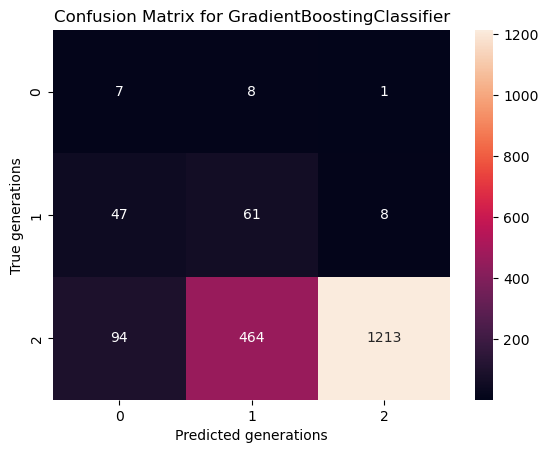


Accuracy of SVC: 67.31


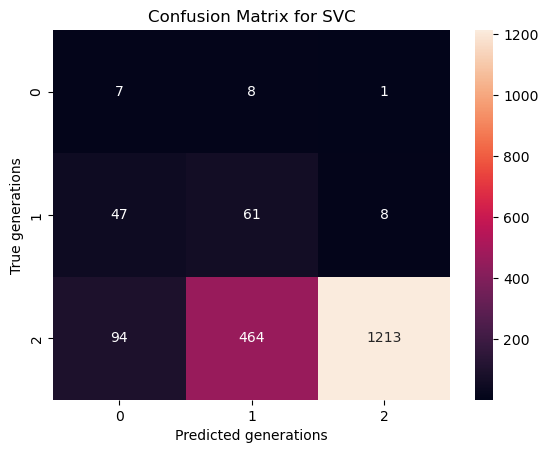


Accuracy of MultinomialNB: 67.16


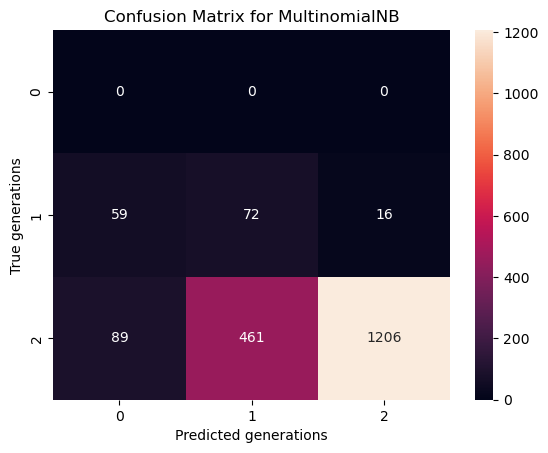


Accuracy of BernoulliNB: 67.26


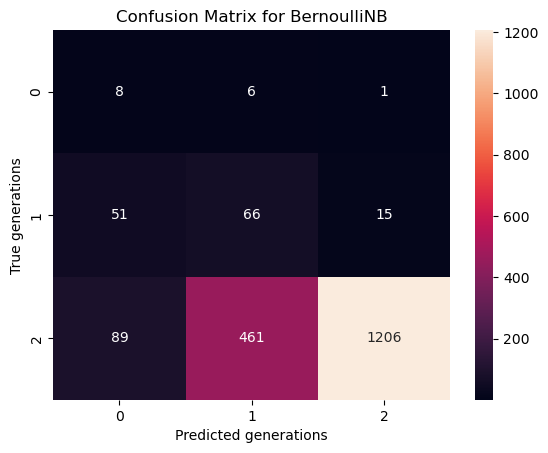

In [109]:
test_algorithms(x, y)

# Conclusion

I have analyzed the dating app data to develop two models for predicting the ages as well as the generations of the OKCupid users based on their profile on the website. The age prediction results are low, with the best performing model, LinearRegression, having an accuracy of only 22%. I believe this is because when the text based 'essay' columns are removed, there is not much data for accurate prediction. The generation prediction scores are higher. The best performing models are GradientBoostingClassifier and SVC. After multiple runs, both these models have predicted with an accuracy_score of exactly 67.31% all the time. Again, the relatively low accuracy score might be because of the lack of training data. I would like to come back to this and improve these scores.